# 17 Προσαρμογή καμπύλης με την SciPy (λύσεις)

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό το μάθημα θα γίνει μια εισαγωγή στην βιβλιοθήκης `SciPy` που έχει να κάνει με την επιστημονική χρήση της Python. Παρέχει δηλαδή μια σειρά από χρήσιμα εργαλεία για την αντιμετώπιση μιας ευρείας γκάμας προβλημάτων. Πιο συγκεκριμένα θα δούμε εφαρμογές προσαρμογής (fitting) σε δεδομένα:
    
- με γραμμική προσέγγιση
    
- με μη γραμμική προσέγγιση
    
- μέσω της μεθόδου `curve_fit`.    
    
Δίνονται ασκήσεις που θα βοηθήσουν περαιτέρω στην κατανόηση της προσαρμογής, ενώ ταυτόχρονα μπορούν να λειτουργήσουν σαν αναφορά για τα δικά σας προβήματα.      
    
</div>

- - - 

## 17.1 Εισαγωγή 

Η βιβλιοθήκη ``SciPy`` είναι χτισμένη πάνω στο πλαίσιο της βιβλιοθήκης ``NumPy`` για πολυδιάστατους πίνακες και παρέχει έναν πολύ μεγάλο αριθμό επιστημονικών αλγορίθμων υψηλού επιπέδου. Μερικά από τα θέματα και τις τεχνικές που καλύπτει η βιβλιοθήκη ``SciPy`` είναι τα ακόλουθα:

- Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))


- Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))


- Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))


- Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))


- Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))


- Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))


- Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))


- Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))


- Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))


- Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))


- File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))


Κάθε μα από αυτές τις υποενότητες παρέχει έναν αριθμό συναρτήσεων και κλάσεων που μπορούν να χρησιμοποιηθούν για την επίλυση προβλημάτων στα αντίστοιχα θέματα. Στο παρόν μάθημα θα επικεντρωθούμε σε ορισμένες μόνο περιπτώσεις. 

Όπως και τις υπόλοιπες βιβλιοθήκες πρέπει να την εισάγουμε αντίστοιχα, δηλαδή:

```python
import scipy 

import scipy as sp

from scipy.<package> import <function>
```

Η τελευταία εκδοχή εισάγει μόνο μια συγκεκριμένη συνάρτηση από ένα από υποπακέτα που έχει η βιβλιοθήκη.

## 17.2 Προσαρμογή καμπύλης στα δεδομένα  - γραμμική προσέγγιση

Η προσαρμογή κάποιας καμπύλης στα πειραματικά δεδομένα είναι από τις πιο σημαντικές δεξιότητες που μπορείτε να αποκτήσετε. Με αυτόν τον τρόπο μπορείτε να βρείτε ποιό θεωρητικό μοντέλο περιγράφει καλύτερα τα δεδομένα σας και βάσει αυτού μπορείτε να κάνετε προβλέψεις για κάποιο άλλο σύνολο δεδομένων.

### 17.2.1  Σκοπός της προσαρμογής συνάρτησης

Όταν δίνονται κάποια $x_{\rm data} = [\dots]$, $y_{\rm data} = [\dots]$ και ένα θεωρητικό μοντέλο που περιγράφεται από τη συνάρτηση $f$ η οποία εξαρτάται από κάποιες άγνωστες παραμέτρους $\beta$, ο σκοπός είναι να βρούμε τον καλύτερο δυνατό συνδυασμό των παραμέτρων $\beta$ ώστε η συνάρτηση $y = f(x, \beta)$ να έχει παρόμοια συμπεριφορά με τα δεδομένα μας (δηλαδή να τα περιγράφει με καλή ακρίβεια).

Ένας τρόπος να το επιτύχουμε αυτό είναι να ελαχιστοποιήσουμε την ποσότητα $\sum_i \left(y_i - f(x_i, \beta)\right)^2$ με το να προσαρμόζουμε τις παραμέτρους $\beta$. Εδώ, τα $x_i$ και $y_i$ είναι το $i$-οστό σημείο στα δεδομένα μας. Αυτή τη τεχνική ονομάζεται ***μέθοδος των ελαχίστων τετραγώνων***.

### 17.2.2 Εύρεση βέλτιστων παραμέτρων 

Έστω ότι μας δίνεται ένα σύνολο δεδομένων, $\{x_i, y_i\}$ με $i=1,\dots,n$, όπου $n$ το σύνολο των σημείων που περιέχει και το οποίο παρουσιάζει μία γραμμική συμπεριφορά (π.χ. δες σχήμα παραπάνω). Ο σκοπός μας είναι να φτιάξουμε ένα μοντέλο απλής γραμμικής παλινδρόμησης 

$$f(x, \beta) \equiv f(x, m, b) = y = mx + b,\quad\beta = (m, b)$$ 

το οποίο θα περιγράφει τα εν λόγω δεδομένα σχετίζοντας τα σημεία $x_i$ με τα σημεία $y_i$.

Για να βρούμε την ευθεία που "ταιριάζει" καλύτερα για το πλήθος των σημείων $\{x_i, y_i\}$ σημαίνει ότι πρέπει να βρούμε ποιές είναι οι βέλτιστες τιμές των παραμέτρων $\beta$, δηλαδή της κλίσης $m$ και του σταθερού όρου $b$, για το συγκεκριμένο σύνολο δεδομένων.

Προκειμένου να το επιτύχουμε αυτό, μπορούμε να ορίσουμε μία συνάρτηση σφάλματος (a.k.a. cost function):

$$S(\beta) = \sum_{i=1}^n r_i^2 =  \sum_{i=1}^{n} (y_i - m x_i - b)^2,\quad\beta = (m, b)$$

και να βρούμε για ποιές τιμές των παραμέτρων $\beta$ αυτή η συνάρτηση ελαχιστοποιείται, όπου $r$ είναι το σφάλμα ή κατάλοιπο (residual). H τεχνική ονομάζεται μέθοδος των ελαχίστων τετραγώνων, καθώς προσπαθούμε να ελαχιστοποιήσουμε το τετράγωνο της διαφοράς $r = y - f(x,\beta)$, όπου $y$ είναι οι παρατηρήσεις μας και $f(x, \beta)$ η πρόβλεψη του μοντέλου μας που αντιστοιχεί σε αυτή την παρατήρηση.

Μπορεί να δειχθεί αναλυτικά ότι οι τιμές $m$ και $b$ που ελαχιστοποιούν την συνάρτηση σφάλματος $S(\beta)$ δίνονται από τις σχέσεις:

$$ m = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y}) }{\sum_{i=1}^n (x_i-\bar{x})^2} $$

$$ b = \bar{y} - m \bar{x} $$

όπου $ \bar{x}=\frac{1}{n}\sum_{i=1}^n x_i, \bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$ οι μέσες τιμές. 

Ακολουθεί ένα απλό παράδειγμα όπου:

1. παράγουμε κάποια τυχαία δεδομένα με θόρυβο που παρουσιάζουν μια γραμμική συμπεριφορά

2. κατασκευάζουμε μια συνάρτηση που υπολογίζει τις βέλτιστες τιμές των παραμέτρων $m$ και $b$ για ένα απλό γραμμικό μοντέλο (γραμμικής παλινδρόμισης - linear regression).

In [1]:
# Suppress any annoying warning messages 
# Not necessary for what we are doing here - try to avoid it
# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

# Change the default settings
plt.rcParams.update({'font.size': 18})   # font size for all text elements
plt.rcParams['figure.figsize'] = [8, 6]  # figure size

In [2]:
# Generate some data and and some noise that follows a Gaussian distribution
np.random.seed(42)

x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 1, len(x))

Text(0, 0.5, 'y')

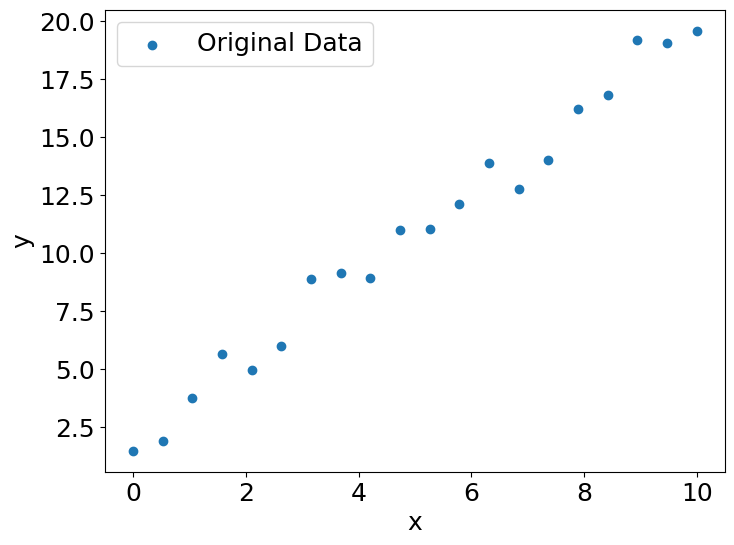

In [3]:
# Visualize the data set
plt.scatter(x, y, label='Original Data')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')


In [4]:
def linear_regression_model(x, slope, intercept):
    """
    Calculate the predicted values of a linear regression model.

    Parameters:
    ===========
        - x (numpy.ndarray) : The independent variable values.
        - slope (float)     : The slope (coefficients) of the linear model.
        - intercept (float) : The intercept (bias) of the linear model.

    Returns:
    ========
        numpy.ndarray: An array of predicted values based on the linear regression model.

    Example:
    ========
        >>> x = np.array([1, 2, 3, 4, 5])
        >>> slope = 2.0
        >>> intercept = 1.0
        >>> linear_model(x, slope, intercept)
        array([ 3.,  5.,  7.,  9., 11.])

    Note:
    =====
        The linear regression model is represented as y = mx + b, where:
            - y is the dependent variable (predicted values),
            - m is the slope (coefficients),
            - x is the independent variable,
            - b is the intercept (bias).
    """
    return slope * x + intercept



def linear_regression_fit(x, y):
    """
    Calculate the parameters (slope and intercept) for a linear regression model 
    using the least squares method.

    Parameters:
    ===========
        - x (numpy.ndarray) : The independent variable values.
        - y (numpy.ndarray) : The dependent variable values.

    Returns:
    ========
        tuple : A tuple containing the calculated parameters (slope, intercept) for the 
        linear regression model.

    Example:
    ========
        >>> x = np.array([1, 2, 3, 4, 5])
        >>> y = np.array([2, 4, 5, 4, 5])
        >>> linear_regression_fit(x, y)
        (0.4, 2.2)

    Note:
    =====
        The linear regression model is represented as y = mx + b, where:
            - m is the slope (calculated parameter),
            - b is the intercept (calculated parameter).

        The function uses closed-form solutions derived from the least squares method to 
        find the optimal parameters.
    """
    
    N = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    return m, b

In [5]:
# Calculate linear regression parameters for our dataset
m_fit, b_fit = linear_regression_fit(x, y)

print(f'Fitted Line: y = {m_fit:.2f}x + {b_fit:.2f}')

Fitted Line: y = 1.81x + 1.77


Text(0.5, 1.0, 'Linear Regression')

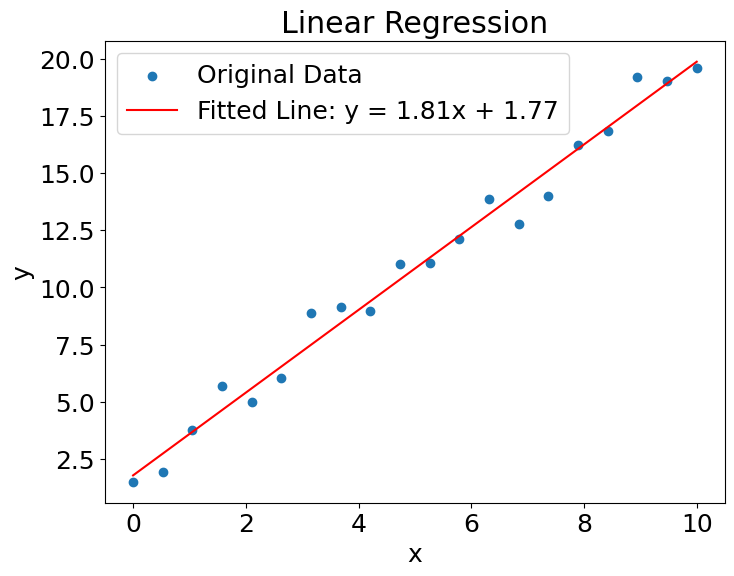

In [6]:
# Generate points for the fitted line
x_fitted = np.linspace(0, 10, 100)
y_fitted = linear_regression_model(x_fitted, m_fit, b_fit)

# Plot the original data and the fitted line
plt.scatter(x, y, label='Original Data')
plt.plot(x_fitted, 
         y_fitted, 
         color='red', 
         label=f'Fitted Line: y = {m_fit:.2f}x + {b_fit:.2f}'
        )

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')


### 17.2.3 Χρησιμοποιώντας την `SciPy`

Μπορούμε να αξιοποιήσουμε τις διαθέσιμες συναρτήσεις από την `SciPy`που περιέχει τρόπους λύσης των ελαχίστων τετραγώνων. H πιο απλή εκδοχή είναι να χρησιμοποιηθεί η αντίστοιχη συνάρτηση `scipy.linalg.lstsq` που ελαχιστοποιεί το άθροισμα των τετραγώνων ([περισσότερα](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq)). Η διαφορά εδώ είναι ότι αυτή η συνάρτηση αυτή είναι πιο γενική και δουλεύει με πίνακες, και άρα όλη η διαδικασία μετατρέπεται σε πράξεις μεταξύ πινάκων. 

H γενίκευση αφορά τόσο στις διαστάσεις/αριθμό παραμέτρων $p$ όσο και στον αριθμό των δειγμάτων $n$ οπότε για κάθε δείγμα ($Χ_i$) έχουμε: 

$$ Χ_i = [x_{i,0}, x_{i,1}, x_{i,2}, ..., x_{i,p}] $$

Οπότε συνολικά έχουμε ένα πίνακα: 

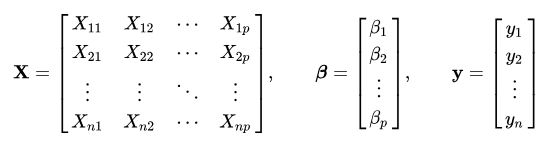

Με δεδομένο ένα μονοδιάστατο γραμμικό μοντέλο 

$$ y = \alpha{}x + \beta$$

η επέκταση σε περισσότερες διαστάσεις ($p$) θα είναι της μορφής: 

$$ y = \beta_1{}x_{1} + \beta_2{}x_{2} + ... + \beta_p{}x_{p} + const$$

όπου το "_const_" είναι ισοδύνατο του $\beta$ στην μονοδιάστατη περίπτωση. (Οι παράμετροι $\beta_1$, $\beta_2$, $\beta_3$, κλπ χρησιμοποιούνται για την γενίκευση.)

Αντί να έχουμε την σταθερά ξεχωριστά μπορούμε να την συμπεριλάβουμε στον πίνακα $x$ θέτοντας για κάθε $x_{i,0} = 1$ και εισάγωντας την σταθερά για κάθε $i$ ξεχωριστά σαν $\beta_{0}$ (δείτε σχετικά [wikipedia OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares)). Έτσι φτάνουμε στο γενικευμένο πολυδιάστατο γραμμικό μοντέλο, το οποίο πρέπει να ισχύει για κάθε δείγμα $i$:

$$ y_i = \beta_0 1 + \beta_1 x_{i, 1} + \beta_1 x_{i, 1} + \beta_2 x_{i, 2} + ... + \beta_p x_{i, p} $$

οπότε και σε διανυσματική αναπαράσταση:

$$ y_i = \pmb{x_{i}}^T \pmb{\beta}$$

για κάθε σημείο $i$. Στην αναπαράσταση πινάκων η εξίσωση μετατρέπεται σε:

$$ \pmb{y} = \pmb{X} \pmb{\beta}$$



οπου 
$$
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix},
\quad
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np}
\end{bmatrix},
\quad
\boldsymbol{\beta} =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_p
\end{bmatrix}.
$$


Θεωρούμε και πάλι ότι η συνάρτηση που θέλουμε να ελαχιστοποιήσουμε είναι η διαφορά τετραγώνων, αλλά εκφρασμένη τώρα σε μορφή πινάκων:

$$ S(\pmb{\beta}) = || \pmb{y} - \pmb{X} \pmb{\beta} ||^2$$

Για να βρούμε το ελάχιστό της αρκεί να βρούμε τα σημεία για τα οποία

$$ 0 = \frac{\partial S(\pmb{\beta})}{\partial \pmb{\beta}} $$

Ωστόσο, αυτό θέλουμε να πραγματοποιηθεί **ως προς το $\pmb{\beta}$** και όχι το $\pmb{X}$ !

Μετά από πράξεις (δείτε σχετικά στο [wikipedia Least squares](https://en.wikipedia.org/wiki/Least_squares))  καταλήγουμε στην μορφή

$$ \pmb{X}^T\pmb{y} =  \pmb{X}^T\pmb{X}\pmb{\beta} $$

$$ \pmb{\hat{\beta}} = (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^T\pmb{y} $$

Οπότε το πρόβλημά μας εστιάζεται στην διαχείριση των πινάκων και στην εύρεση του $(\pmb{X}^T\pmb{X})^{-1}$ -- που δεν είναι απαραίτητα εύκολη υπόθεση (ιδιαίτερα με μεγάλους πίνακες).


[1.81082696 1.77456663]


Text(0.5, 1.0, 'SciPy solution')

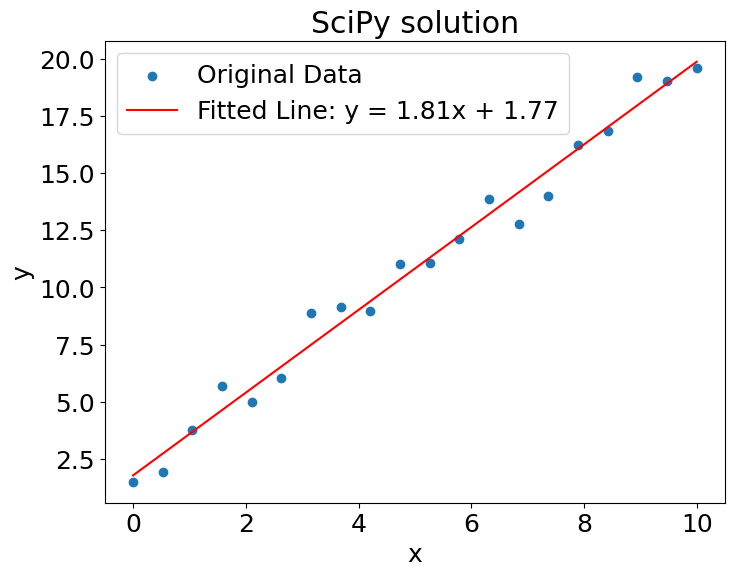

In [8]:
from scipy.linalg import lstsq

def linear_model(x, slope, intercept):
    return  slope * x + intercept

# the trick to absorb the const into the beta array
x_tr = np.vstack([x, np.ones(len(x))]).T

# solving and getting the parameters/betas only
params = lstsq(x_tr, y)[0]

print(params)

y_fitted = linear_model(x_fitted, *params)

# Plot the original data and the fitted line
plt.scatter(x, y, label='Original Data')
plt.plot(x_fitted, 
         y_fitted, 
         color='red', 
         label=f'Fitted Line: y = {params[0]:.2f}x + {params[1]:.2f}'
        )

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('SciPy solution')

## 17.3 Προσαρμογή καμπύλης στα δεδομένα - μη γραμμική προσέγγιση

### 17.3.1 Μη γραμμική βελτιστοποίηση

Για απλά μοντέλα όπως η γραμμική παλινδρόμηση, οι λύσεις κλειστής-μορφής παρέχουν μια αναλυτική έκφραση για τις βέλτιστες παραμέτρους και μπορούν να είναι υπολογιστικά αποδοτικές καθώς υπολογίζουν απευθείας τη λύση με βάση αυτούς τους μαθηματικούς τύπους.
 
&#9755; Σημειώστε ότι η γραμμικότητα έχει να κάνει με τον βαθμό των **παραμέτρων** $\beta$ και όχι με τον βαθμό των $x$.


Όμως οι λύσεις αυτές  μπορεί να καταστούν μη-πρακτικές (π.χ. για πάρα πολύ μεγάλα μεγέθη δειγμάτων και παραμέτρων) ή ακόμα και ανύπαρκτες για πιο πολύπλοκα μοντέλα, όπως αυτά που περιλαμβάνουν μη-γραμμικότητες ή αλληλεπιδράσεις μεταξύ μεταβλητών (π.χ. $ y = \beta_1e^{\beta_2 x}, y = sin(\beta_1 x)$).  

Σε αυτές τις περιπτώσεις, μια επαναληπτική μέθοδος βελτιστοποίησης όπως ο αλγόριθμος [Levenberg-Marquardt](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) αποδεικνύονται εξαιρετικά χρήσιμες ή ακόμα και αναγκαίες. Αυτές οι μέθοδοι είναι πιο γενικές και μπορούν να χειριστούν ένα ευρύτερο φάσμα προβλημάτων βελτιστοποίησης καθώς λειτουργούν περιορίζοντας επαναληπτικά τις εκτιμήσεις των παραμέτρων προσαρμόζοντάς τις προς την κατεύθυνση που ελαχιστοποιεί την συνάρτηση σφάλματος.

### 17.3.2 Ο αλγόριθμος Levenberg-Marquardt

Ο στόχος και πάλι είναι η ελαχιστοποίηση της συνάρτησης τετραγώνων (συνάρτηση κόστους). Για να επιτευχθεί αυτό επαναληπτικά τα βήματα που ακολουθούνται από τον αλγόρθμο είναι τα εξής: 

1. Ξεκινάει από ένα αρχικό σημείο (τυχαίο, επιφοίτηση, από κάποιον άλλον, ...) στον χώρο των παραμέτρων.

2. Yπολογίζει την διαφορά των προβλέψεων του μοντέλου από τα δεδομένα (residuals).

3. Κοιτώντας γύρω από την περιοχή αυτού του σημείου βλέπει προς τα που η κλίση μειώνεται (και άρα ελαχιστοποιείται η διαφορά των προβλέψεων από τα δεδομένα - η συνάρτησή κόστους). 

4. Επιλέγει ένα βήμα, ανάλογα με το πόσο κοντά ή μακριά δείχνει να είναι από την λύση.

    α. Μικρό και προσεχτικό όταν είναι μακριά από την βέλτιση λύση
    
    β. Μεγάλο και γρήγορο όταν είναι κοντά.

5. Δοκιμάζει το βήμα και ελέγχει: 

    α. αν το αποτέλεσμα είναι καλύτερο τότε συνεχίζουμε προς αυτή την κατεύθυνση
    
    β. αν όχι τότε επιστρέφει και επιλέγει ένα πιο μικρό και προσεχτικό βήμα.
    
4. Επαναλαμβάνει τα παραπάνω βήματα (2--5) μέχρι το σημείο που οποιαδήποτε άλλη αλλαγή δεν βελτιώνει σημαντικά τις διαφορές (residuals).

Αφαιρώντας τις μαθηματικές λεπτομέρειες η τελική εξίσωση που λύνεται στο βήμα 3 είναι: 

$$
\begin{equation}
 \big(\pmb{J}^T\pmb{J} + \lambda \pmb{I}\big)\pmb{\delta} = \pmb{J}^T[\pmb{y} - \pmb{f(\bar{\beta})}] 
\end{equation}
$$

όπου $\pmb{J}$ είναι ο ιακωβιανός πίνακας (δηλαδή ο πίνακας με τις μερικές παραμέτρους ως προς το ${\beta}$ και πάλι), $\pmb{\delta}$ είναι το βήμα που επιλέγεται, και $\lambda$ είναι ένα παράγοντας απόσβεσης που ρυθμίζει το πόσο γρήγορα "κινείται" ο αλγόριθμός στον χώρο. Αυτός βοηθάει στην γρηγορότερη σύγκλιση και στην μεγαλύτερη ακρίβεια εντοπισμού του ελαχίστου (και ήταν η κύρια συμβολή του Levemberg - [περισσότερα](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)). 

&#9755; Μια επίδειξη πως λειτουργεί ο αλγόριθμος και ποιο είναι το αποτέλεσμα με την επανάληψη δείτε σχετικά στη σελίδα [github/abnerbog (Abner Bogan)](https://github.com/abnerbog/levenberg-marquardt-method).

### 17.2.3 Η συνάρτηση βελτιστοποίησης `curve_fit`

Η βιβλιοθήκη ``Scipy`` προσφέρει την συνάρτηση ``curve_fit`` ([περισσότερα](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)) η οποία χρησιμοποιεί την μέθοδο των μη-γραμμικών ελαχίστων τετραγώνων και τον αλγόριθμο Levenberg-Marquardt, για την εύρεση των βέλτιστων τιμών των παραμέτρων προσαρμογής. 

Ας δούμε πως εφαρμόζεται με το ακόλουθο παράδειγμα.

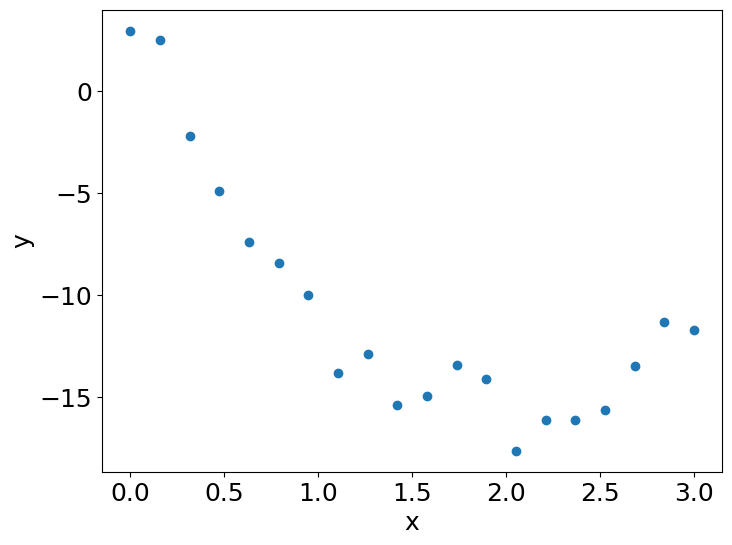

In [9]:
import scipy.optimize as so

# Let's look at some sample data
x_data = np.array([0., 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.])

y_data = np.array([2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
        -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
       -12.91548145, -15.41149046, -14.93516299, -13.42514157,
       -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
       -15.66076021, -13.48938865, -11.33918701, -11.70467566])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_data,y_data)

Η μορφή της κατανομής των δεδομένων μας θυμίζει αρκετά ένα πολυώνυμο δευτέρου βαθμού. Είναι λογικό, λοιπόν, να θεωρήσουμε ότι ένα πολυώνυμο της μορφής

$$f(x, \beta) = f(x,a,b,c) = a(x-b)^2 + c$$

όπου $\beta = (a,b,c)$, αποτελεί ένα ικανοποιητικό θεωρητικό μοντέλο που μπορεί να περιγράψει την κατανομή των δεδομένων μας. Αυτό που πρέπει να προσδιορίσουμε τώρα είναι για **ποιές τιμές των $a$, $b$ και $c$** το παραπάνω θεωρητικό μοντέλο έχει την καλύτερη δυνατή συμπεριφορά που ταιριάζει στα δεδομένα μας.

Αυτό προϋποθέτει δύο βήματα:

1. Να ορίσουμε τη συνάρτηση του θεωρητικού μοντέλου.

2. Να χρησιμοποιήσουμε τη συνάρτηση ``curve_fit`` που παρέχεται από τη βιβλιοθήκη ``scipy.optimize``. Αυτή η συνάρτηση απαιτεί να δώσουμε κάποιες αρχικές τιμές για τις παραμέτρους $\beta$, κάτι που πρέπει να γίνει με προσοχή όταν έχουμε πολύπλοκα μοντέλα, αλλιώς η συνάρτηση μπορεί να μην δώσει αξιόπιστα αποτελέσματα.


<!-- <div style="background-color:rgba(239, 45, 45, 0.2)"> -->
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<br>
    <b>ΠΡΟΣΟΧΗ</b>: Μην χρησιμοποιείτε την μέθοδο <mark>curve_fit</mark> όταν έχετε σφάλματα και στις δύο μεταβλητές! Σε αυτή την περίπτωση θα πρέπει να καταφύγετε στην χρήση άλλων μεθόδων (π.χ. <a href="https://docs.scipy.org/doc/scipy/reference/odr.html">Orthogonal distance regression</a>).
<br><br>
</div>

In [10]:
# Define the function that describes the 
# theoretical model
def polynomial_model(x, a, b, c):
    """A second order polynomial function"""
    return a*(x-b)**2 + c

In [11]:
# Fit the theoretical curve on our data
popt, pcov = so.curve_fit(polynomial_model, x_data, y_data)

Η συνάρτηση ``curve_fit`` επιστρέφει δύο πίνακες:

1. τον πίνακα ``popt``, που περιέχει τις βέλτιστες τιμές για τις παραμέτρους $\beta$ του μοντέλου ``polynomial_model``, για τα συγκεκριμένα σύνολα δεδομένων ``x_data`` και ``y_data``.

In [12]:
popt

array([  4.92207992,   2.00492121, -16.04690266])

In [13]:
print("a = %f" % (popt[0]))
print("b = %f" % (popt[1]))
print("c = %f" % (popt[2]))

a = 4.922080
b = 2.004921
c = -16.046903


In [14]:
print("a = {} \nb = {} \nc = {}".format(*popt))

a = 4.922079922602843 
b = 2.004921210691221 
c = -16.04690266030743


2. τον πίνακα ``pcov``. Αυτός ο πίνακας ονομάζεται **πίνακας συνδιακύμανσης** (covariance matrix) και μας δίνει μια εκτίμηση για το σφάλμα των παραμέτρων που περιέχει ο πίνακας ``popt`` (δηλαδή των παραμέτρων $\beta = (a,b,c)$ και πόσο καλή είναι η προσαρμογή της θεωρητικής καμπύλης στα δεδομένα μας). Το "σφάλμα" σε κάθε μια από τις παραμέτρους του μοντέλου μας συνδέεται με το πόσο ευαίσθητο είναι το μοντέλο μας σε αλλαγές αυτής της παραμέτρου. Επίσης, μας δίνει πληροφορίες σχετικά με τον ποιό τρόπο εξαρτώνται οι παράμετροι της προσαρμογής $\beta$ μεταξύ τους.

In [15]:
pcov

array([[ 0.12827821, -0.01315915, -0.07363194],
       [-0.01315915,  0.00222114,  0.00322289],
       [-0.07363194,  0.00322289,  0.13377697]])

Παρατηρήστε ότι ο πίνακας συνδιακύμανσης είναι δισδιάστατος: **τα διαγώνια στοιχεία του πίνακα αφορούν το σφάλμα (διακύμανση-variance) για κάθε μια από τις παραμέτρους προσαρμογής** και τα μη-διαγώνια στοιχεία αφορούν τη σχέση μεταξύ των παραμέτρων. 

Η τετραγωνική ρίζα της διακύμανσης θα μας δώσει τα αντίστοιχα $1\sigma$-σφάλματα.

In [16]:
p_sigma = np.sqrt(np.diag(pcov))
p_sigma

array([0.35815948, 0.04712895, 0.36575534])

In [16]:
print("a = %f +/- %f" % (popt[0], p_sigma[0]))
print("b = %f +/- %f" % (popt[1], p_sigma[1]))
print("c = %f +/- %f" % (popt[2], p_sigma[2]))

a = 4.922080 +/- 0.358159
b = 2.004921 +/- 0.047129
c = -16.046903 +/- 0.365755


Έχοντας αποκτήσει τις βέλτιστες τιμές για τις παραμέτρους προσαρμογής, μπορούμε να φτιάξουμε ένα διάγραμμα όπου θα φαίνονται τα πειραματικά μας δεδομένα και η καμπύλη προσαρμογής. Αυτό θα μας βοηθήσει να δούμε το πόσο καλά το θεωρητικό μοντέλο που επιλέξαμε περιγράφει τα δεδομένα που έχουμε.

Για να κατασκευάσουμε την καμπύλη προσαρμογής, πρέπει να φτιάξουμε ένα διάστημα τιμών για τον $x$-άξονα. Εφόσον θέλουμε να έχουμε τοσο την καμπύλη προσαρμογής όσο και τα δεδομένα στο ίδιο γράφημα, πρέπει αυτό το διάστημα τιμών να έχει το ίδιο εύρος με αυτό των δεδομένων.

In [17]:
# Unpack the fitting parameters
a_opt, b_opt, c_opt = popt

# Create the x-axis intervals
x_model = np.linspace(min(x_data), max(x_data), 100)

# and the y-values from the theoretical model
# that correspond to this interval
y_model = polynomial_model(x_model, a_opt, b_opt, c_opt)

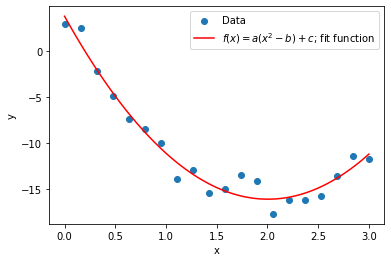

In [18]:
plt.xlabel('x')
plt.ylabel('y')

# Plot the dataset
plt.scatter(x_data, y_data, label='Data')

# Overplot the fit function
plt.plot(x_model, y_model, color='r', label=r'$f(x) = a(x^2 - b) + c$; fit function')

plt.legend(loc='upper right')

Έχοντας το θεωρητικό μοντέλο που περιγράφει τα δεδομένα μας καθώς και το $1\sigma$-σφάλμα αυτών των παραμέτρων, μπορούμε να συμπεριλάβουμε και το **διάστημα εμπιστοσύνης** (confidence levels) της καμπύλης προσαρμογής. Ας υποθέσουμε ότι θέλουμε να κατασκευάσουμε το διάστημα εμπιστοσύνσης που αντιστοιχεί σε δύο τυπικές αποκλίσεις από τη μέση τιμή ($2\sigma$ confidence levels).

Σε αυτή την περίπτωση το άνω/κάτω όριο θα απέχει από τη μέση τιμή δύο φορές την τυπική απόκλιση που πήραμε από τον πίνακα συνδιακύμανσης. Έχοντας τα πάνω και κάτω όρια, μπορούμε απλά να γραμμοσκιάσουμε την περιοχή μεταξύ αυτών των τιμών.

In [19]:
nstd = 2. # number of standard deviations

popt_up = popt + nstd * p_sigma # the upper limit (+2sigma)
popt_low = popt - nstd * p_sigma # the lower limit (-2sigma)

# The x-y values for the 2-sigma upper/lower curves
# check the "packed" way the parameters are inserted in the function
y_fit_up = polynomial_model(x_model, *popt_up)
y_fit_low = polynomial_model(x_model, *popt_low)

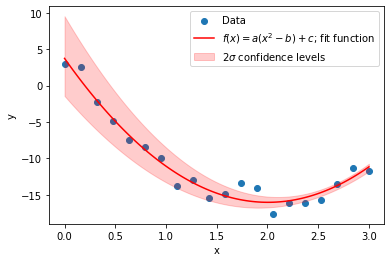

In [20]:
plt.xlabel('x')
plt.ylabel('y')

# Plot the dataset
plt.scatter(x_data, y_data, label='Data')

# Overplot the fit function
plt.plot(x_model, y_model, color='r', label=r'$f(x) = a(x^2 - b) + c$; fit function')

# Overplot the confidence levels
plt.fill_between(x_model, y_fit_up, y_fit_low, 
                 alpha=0.2, color='r', 
                 label=r'2$\sigma$ confidence levels')

plt.legend(loc='upper right')
plt.show()

Έτσι, καταλήγουμε στο συμπέρασμα ότι η αναλυτική σχέση (θεωρητικό μοντέλο) που περιγράφει το σύνολο των δεδομένων μας είναι η:

$$f(x) = 4.92 \pm 0.35 \left(x - 2.00 \pm 0.04 \right)^2 - 16.04 \pm 0.36$$

Χρησιμοποιώντας αυτό το θεωρητικό μοντέλο, μπορούμε τώρα να κάνουμε προβλέψεις για τιμές που δεν ανήκουν στο αρχικό σύνολο δεδομένων. Για παράδειγμα, για $x=0.2$ (τιμή που δεν αποτελεί μέρος των μετρήσεών μας) περιμένουμε σύμφωνα με το μοντέλο μας ότι $y= - 0.099$.

## 17.4 Ασκήσεις

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 17.1</b>

Η άσκηση αποτελεί μια απλή εφαρμογή της προσαρμογής καμπύλης αλλά συμπεριλαμβάνοντας και τα σφάλματα κατά την διάρκεια της εφαρμογής της. Χρησιμοποιείστε τα παρακάτω (κατασκευασμένα) δεδομένα, και ακολουθήστε τα παρακάτω βήματα.
    
1. Κάντε ένα διάγραμμα με σφάλματα και αποφασίστε ποιό είναι το κατάλληλο μοντέλο που περιγράφει τα δεδομένα. 
    
2. Γράψτε μια συνάρτηση που θα εκπροσωπεί το μοντέλο και εισάγετέ την στην μέθοδο `curve_fit`.
    
3. Έχοντας τις παραμέτρους του μοντέλου δημιουργήστε μια σειρά δεδομένων x_fit στα οποία θα υπολογιστεί το μοντέλο σας (y_fit).
    
4. Κάντε ένα διάγραμμα που θα περιέχει και τα δεδομένα (με τα σφάλματά τους), καθώς και τα σημεία που προκύπτουν από το μοντέλο.
    
5. Χρησιμοποιώντας το προηγούμενο παράδειγμα προσθέστε στο διάγραμμα το διάστημα εμπιστοσύνης (στα 3σ).        
    

In [18]:
# create some mock data
numpoints = 10 # the number of points we want to simulate

x = np.random.uniform(0., 100., numpoints)

# The error on each point comes from a 
# normal distribution with sigma = 10
y_err = np.abs(np.random.normal(0., 10., numpoints))
y = 2. * x + 2.6 + y_err

In [22]:
# You can try it here.

<ErrorbarContainer object of 3 artists>

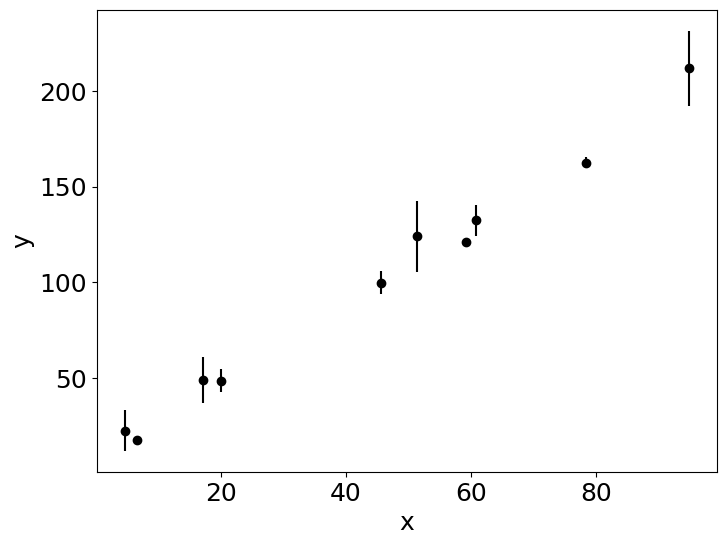

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so

# Step 1
plt.figure(figsize=(8,6))

plt.xlabel('x')
plt.ylabel('y')

plt.errorbar(x, y, yerr=y_err, fmt='o', c='k')

In [20]:
# Step 2 - linear model without errors
def fit_line(x, a, b):
    return a * x + b

# fit without errors
popt, pcov = so.curve_fit(fit_line, x, y)

# print(popt)
# print(pcov)
print('parameters:')
print(f"a = {popt[0]:0.3f} +/- {np.sqrt(pcov[0][0]):0.3f}")
print(f"b = {popt[1]:0.3f} +/- {np.sqrt(pcov[1][1]):0.3f}")

parameters:
a = 2.050 +/- 0.074
b = 9.045 +/- 3.893


In [21]:
# Step 2 - linear model with errors
def fit_line(x, a, b):
    return a * x + b

# fit with errors as absolute
popter, pcover = so.curve_fit(fit_line, x, y, 
                          sigma = y_err)  

# print(popt)
# print(pcov)
print('parameters:')
print(f"a = {popter[0]:0.3f} +/- {np.sqrt(pcover[0][0]):0.3f}")
print(f"b = {popter[1]:0.3f} +/- {np.sqrt(pcover[1][1]):0.3f}")

parameters:
a = 1.958 +/- 0.034
b = 5.261 +/- 2.020


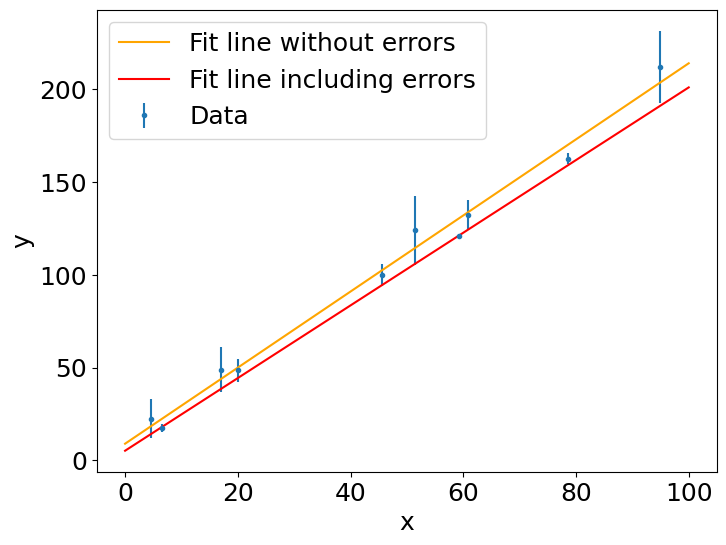

In [22]:
# Step 3  fitting 
x_fit = np.linspace(0.0, 100, 100)
y_fit = fit_line(x_fit, *(popt) )
y_fiter = fit_line(x_fit, *(popter) )

# Step 4 - plotting

plt.xlabel('x')
plt.ylabel('y')

plt.errorbar(x, y, yerr=y_err, fmt=".", 
             label='Data' )
plt.plot(x_fit, y_fit, '-', c='orange',
         label='Fit line without errors'  )
plt.plot(x_fit, y_fiter, '-', c='r', 
         label='Fit line including errors'  )

plt.legend()

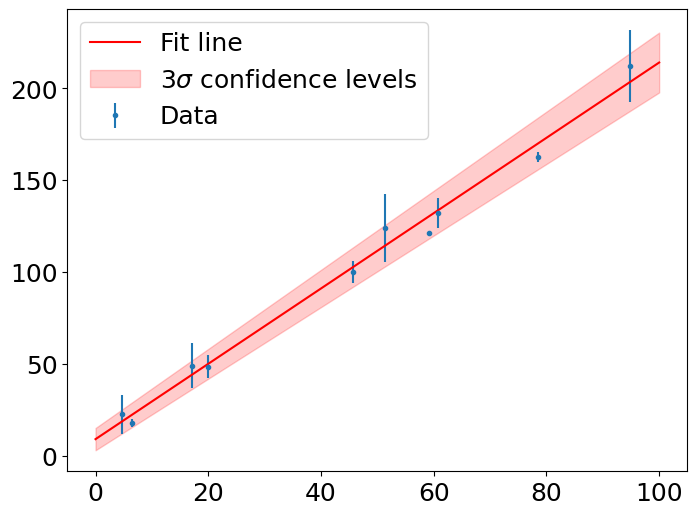

In [23]:
# Step 5 - plotting and adding 3-sigma range
p_sigma = np.sqrt(np.diag(pcover))
nstd = 3. # number of standard deviations

popt_up = popt + nstd * p_sigma # the upper limit
popt_low = popt - nstd * p_sigma # the lower limit

y_fit_up = fit_line(x_fit, *popt_up)
y_fit_low = fit_line(x_fit, *popt_low)

plt.errorbar(x, y, yerr=y_err, fmt=".", 
             label='Data' )
plt.plot(x_fit, y_fit, 'r-', 
         label='Fit line'  )

# Overplot the confidence levels
plt.fill_between(x_fit, y_fit_up, y_fit_low, 
                 alpha=0.2, color='r', 
                 label=r'3$\sigma$ confidence levels')

plt.legend()

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 17.2</b>

##### Διαμοριακές αλληλεπιδράσεις

Το δυναμικό Lennard-Jones είναι ένα δυναμικό που περιγράφει τις αλληλεπιδράσεις μεταξύ ενός ζεύγους μοριών [περισσότερα](https://en.wikipedia.org/wiki/Lennard-Jones_potential)).

Το συγκεκριμένο δυναμικό δίνεται από τη σχέση:

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

Το ζητούμενο είναι να βρούμε τις βέλτιστες τιμές για τα $\sigma$ και $\epsilon$ ώστε το δυναμικό να περιγράφει το καλύτερο δυνατόν τα δεδομένα μας.
    
Για να το πετύχετε αυτό ακολουθήστε τα παρακάτω βήματα:
    
1. Το αρχείο βρίσκεται στο 'data_files/LJ_potential.txt'. Η πρώτη στήλη αφορά την ακτίνα $r$ και η δεύτερη το δυναμικό $V$. Διαβάστε το αρχείο και κάντε αρχικά ένα διάγραμμα για να δείτε τα δεδομένα σας. Χρησιμοποιείστε όποια μέθοδο θέλετε. 
    
2. Δεδομένου ότι το διάγραμμα περιέχει άξονες που περιγράφουν μεγάλους αριθμούς θα ήταν καλή ιδέα να επαναπροσδιοριστεί η κλίμακα. 
    
    - Πολλαπλασιάστε τις τιμές στον $x$-άξονα με ``1e9``. Έτσι, η διάσταση μετατρέπεται από μέτρα σε νανόμετρα.
    
    - Διαιρέστε τις τιμές στον $y$-άξονα με τη σταθερά του Boltzmann: $k_B = 1.3806452 \times 10^{-23}\;\;\text{J/K}$. Έτσι η διάσταση του άξονα μετατρέπεται από Joules σε Kelvin.
    
    - Προσέξτε πως θα κάνετε τις μετατροπές και αν εγγράφετε συνεχώς στις μεταβλητές σας!
    
    - Ξανακάντε το διάγραμμα.
    
3. Γράψτε την συνάρτηση Lennard-Jones. 
    
    
4. Δοκιμάστε την προσαρμογή καμπύλης με `curve_fit`. Τι επιστρέφει η συνάρτηση; 
    
    Η προσαρμογή (μάλλον) δεν μπορεί να γίνει γιατί η συνάρτηση `curve_fit` λειτουργεί επαναληπτικά και δεν ξέρει προς τα που πρέπει να κινηθεί ώστε να ελαχιστοποιήσει τις παραγώγους για τις παραμέτρους. Έτσι θα πρέπει να δώσουμε κάποιες αρχικές τιμές. 
    
    Από τη [Wikipedia](https://en.wikipedia.org/wiki/Lennard-Jones_potential) βρίσκουμε ότι:

    - Το ελάχιστο του δυναμικού είναι για $r\equiv r_{\rm min}=2^{1/6}\sigma$

    - Στο ελάχιστο, η τιμή του δυναμικού είναι: $V(r_{\rm min}) = -\epsilon$
    
    - Από το διάγραμμα μπορείτε να εντοπίσετε τις τιμές της απόστασης και την τιμή του δυναμικού που αντιστοιχούν στο ελάχιστο του. 
    
    - Ορίστε τις αρχικές παραμέτρους με βάση τα παραπάνω. 
    
5. Εφαρμόστε την `curve_fit`, και τυπώστε τις βέλτιστες τιμές μαζί με τα σφάλματά τους.
    
6. Κάντε ένα διάγραμμα με τα δεδομένα και την καμπύλη προσαρμογής σε αυτά.

In [25]:
# You can try it here.
!cat 'data_files/LJ_potential.txt'

3.199999999999999806e-10,4.591460374668700739e-21
3.268686868686868381e-10,3.056292272369909861e-21
3.337373737373737473e-10,1.095218392291651177e-21
3.406060606060606048e-10,-1.126707927874170865e-22
3.474747474747474623e-10,-2.902289449994577072e-22
3.543434343434343198e-10,-1.337244568216723432e-21
3.612121212121211773e-10,-1.131757369200116175e-21
3.680808080808080865e-10,-1.670423995942307242e-21
3.749494949494949440e-10,-1.474533543996716467e-21
3.818181818181818015e-10,-1.601842619912138964e-21
3.886868686868687107e-10,-1.734265938985179617e-21
3.955555555555555682e-10,-1.865991481099177171e-21
4.024242424242424257e-10,-2.102299553195325766e-21
4.092929292929292832e-10,-1.677907801863007545e-21
4.161616161616161407e-10,-1.331753315985673461e-21
4.230303030303030499e-10,-1.352721319224972248e-21
4.298989898989899074e-10,-9.284461374196357410e-22
4.367676767676767649e-10,-1.028440452780422943e-21
4.436363636363636741e-10,-1.506789993952438999e-21
4.505050505050505316e-10,-6.961633

In [26]:
import pandas as pd

In [27]:
dt = pd.read_csv('data_files/LJ_potential.txt', sep=',', header=None)

dt

,0,1
0,3.200000e-10,4.591460e-21
1,3.268687e-10,3.056292e-21
2,3.337374e-10,1.095218e-21
3,3.406061e-10,-1.126708e-22
4,3.474747e-10,-2.902289e-22
...,...,...
95,9.725253e-10,1.357582e-23
96,9.793939e-10,-2.853622e-22
97,9.862626e-10,1.741369e-22
98,9.931313e-10,3.180185e-22


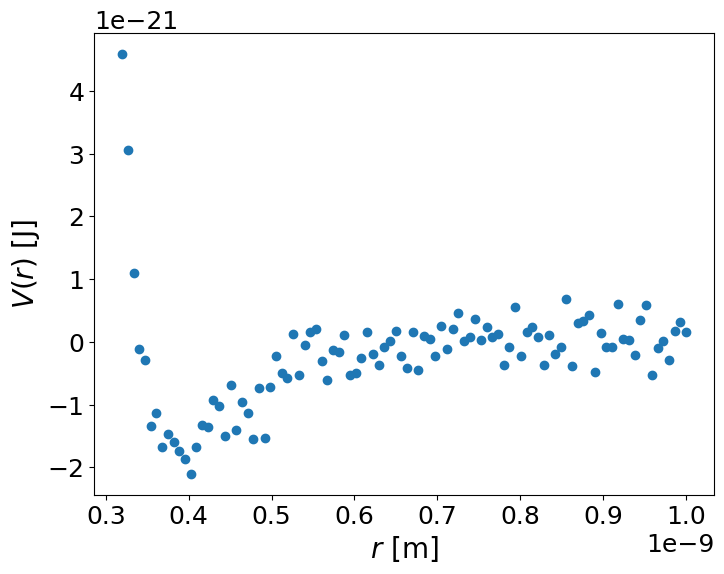

In [28]:
# Step 1 - plotting

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

# reading with pandas 
# import pandas as pd
# dt = pd.read_csv('data_files/LJ_potential.txt', sep=',', header=None)
# r_data, V_data = dt[0], dt[1]

r_data, V_data = np.loadtxt('data_files/LJ_potential.txt', delimiter=',', unpack=True)

plt.xlabel('$r$ [m]', fontsize=20)
plt.ylabel('$V(r)$ [J]', fontsize=20)

plt.scatter(r_data, V_data)

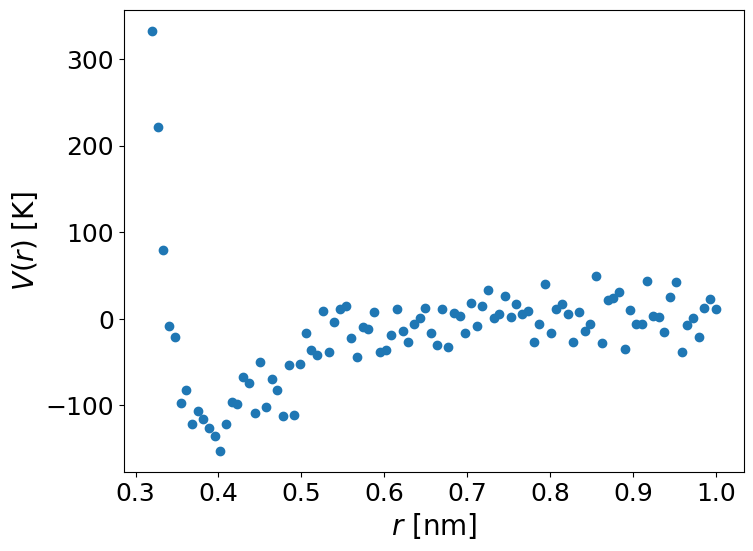

In [29]:
# Step 2 - rescaling and plotting

r_data_mod = r_data * 1e9
V_data_mod = V_data / ( 1.3806452 * 1e-23)


plt.xlabel('$r$ [nm]', fontsize=20)
plt.ylabel('$V(r)$ [K]', fontsize=20)

plt.scatter(r_data_mod, V_data_mod)

In [33]:
# Step 3 - equation

def LJ_potential(r, sigma, epsilon):
    """The Lennard-Jones potential"""
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

# Step 4 - fitting (without guessing)
popt, pcov = so.curve_fit(LJ_potential, 
                          r_data_mod, V_data_mod)

pcov

array([[ 6.41293345e-07, -2.96331491e-03],
       [-2.96331491e-03,  3.49395420e+01]])

In [34]:
# Step 4 - fitting by guessing some initial values

eps_init_guess = -np.min(V_data_mod)
sig_init_guess = 2**(-1/6) * r_data_mod[np.argmin(V_data_mod)]

popt, pcov = so.curve_fit(LJ_potential, 
                          r_data_mod, V_data_mod,
                          p0=[sig_init_guess, eps_init_guess])

# Step 5 - print and apply best values 

print(f'epsilon : {popt[0]:0.4f} +/- {np.sqrt(pcov[0][0]):0.4f} (K)')
print(f'sigma : {popt[1]:0.4f} +/- {np.sqrt(pcov[1][1]):0.4f} (nm)')


epsilon : 0.3414 +/- 0.0008 (K)
sigma : 124.9306 +/- 5.9110 (nm)


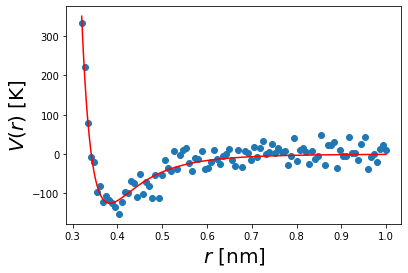

In [35]:
# Step 6 - replotting

r_model = np.linspace(min(r_data_mod), max(r_data_mod), 1000)
V_model = LJ_potential(r_model, *popt)

plt.xlabel('$r$ [nm]', fontsize=20)
plt.ylabel('$V(r)$ [K]', fontsize=20)

# Plot the data
plt.scatter(r_data_mod, V_data_mod)

# Overplot the fitting function
plt.plot(r_model, V_model, color='r')

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 17.3</b>

##### Φασματοσκοπία-γ και προσαρμογή Γκαουσιανής κατανομής

Σκοπός μας στην φασματοσκοπία-γ είναι η καταμέτρηση της έντασης της ακτινοβολίας που εκπέμπεται από μία πηγή ακτίνων γάμμα σαν συνάρτηση της ενέργειας των φωτονίων.

Σε αυτή την άσκηση θα δουλέψουμε με ένα σύνολο δεδομένων που περιέχει το φάσμα ακτίνων-γ μίας μονοενεργειακής πηγής ακτίνων-γ που λήφθηκε με κάποιον ανιχνευτή, συγκεκριμένα του ραδιοϊσοτόπου Καίσιο-137 (Cesium-137; Cs-137). 

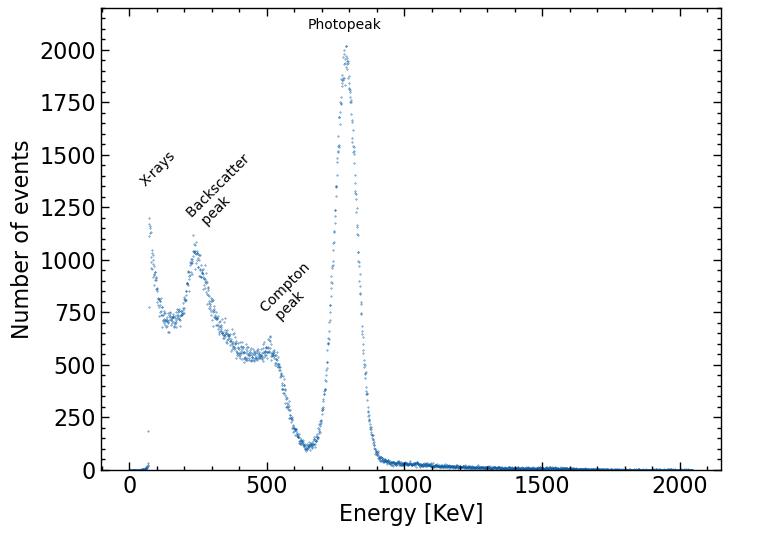
    
    
    
Το αρχείο βρίσκεται στο data_files/cs137_spectrum.txt'). Η πρώτη στήλη περιέχει τον αριθμό των καναλιών. Κάθε κανάλι αντιστοιχεί σε κάποιο συχνοτικό εύρος, άρα αυτή η στήλη ουσιαστικά εκφράζει την ενέργεια των φωτονίων.

Η δεύτερη στήλη περιέχει τον αριθμό των γεγονότων που κατέγραψε ο ανιχνευτής για κάθε ένα από αυτά τα κανάλια. Τις άλλες στήλες μπορείτε να τις αγνοήσετε.
    
Η μεγαλύτερη κορυφή που εμφανίζεται στο φάσμα αντιστοιχεί σε ολική απορρόφηση της ενέργειας των αρχικών ακτίνων-γ και ονομάζεται **φωτοκορυφή**. Χωρίς να μπούμε σε λεπτομέρειες που περιγράφουν την πυρηνική φυσική και τις αλληλεπιδράσεις των σωματιδίων με τον ανιχνευτή, θα αρκεστούμε στο να αναφέρουμε ότι:

- Η **μέση τιμή** της κορυφής μας δίνει πληροφορίες για την ενέργεια των φωτονίων που εκπέμφθηκαν.

- Το **πλάτος (width) της κορυφής** μας δίνει πληροφορίες για την ανάλυση (resolution) του ανιχνευτή.

Συνήθως, κορυφές αυτής της μορφής προσπαθούμε να τις προσεγγίσουμε με μία Γκαουσιανή κατανομή 

$$f(x, A, \mu,  \sigma) = A e^{-(x-\mu)^2/\sigma^2}$$

και να χρησιμοποιήσουμε τις παραμέτρους προσαρμογής $\mu$ και $\sigma$ για να αντλήσουμε πληροφορίες για τις ποσότητες που αναφέραμε πιο πάνω.
    
Σκοπός λοιπόν της άσκησης είναι να βρείτε τις καλύτερες παραμέτρους της Γκαουσιανής κατανομής που μπορεί να περιγράψει την ωτοκορυφή. Για να φτάσετε εκεί ακολουθήστε τα παρακάτω βήματα: 
    
    
1. Διαβάστε το αρχείο και κάντε αρχικά ένα διάγραμμα σαν και αυτό της εικόνας (όχι αναπαραγωγή! Απλά να μπορείτε να δείτε και να επιβεβαιώσετε ότι διαβάζετε σωστά τα δεδομένα σας!). Χρησιμοποιείστε όποια μέθοδο θέλετε. 
    
2. Κάντε ένα διάγραμμα που να επικεντρώνεται μόνο στην φωτοκορυφή (~700-900). 
    
3. Γράψτε την συνάρτηση Γκαους που θα εκπροσωπεί το μοντέλο σας για την φωτοκορυφή.
    
4. Εχοντας την συνάρτηση και τα δεδομένα ('channels' = x, 'counts' = y), δοκιμάστε την προσαρμογή καμπύλης με `curve_fit`. Τι παρατηρείτε; 
    
5. Για να βρούμε κάποιες αρχικές τιμές κοιτάμε το προηγούμενο διάγραμμα (που φαίνεται μόνο η φωτοκορυφή). Από κει μπορούμε να βρούμε τις τιμές που αντιπροσωπεύουν τις παραμέτρους που θέλουμε να εκτιμήσουμε, δηλαδή το ύψος της καμπύλης $A$, την μέση τιμή της ενέργειας που αντιστοιχεί σε αυτό το εύρος $\mu$ και το πλάτος $\sigma$.

6. Τυπώστε και τις βέλτιστες παραμέτρους με τα σφάλματά τους.
    
7. Επαναλάβετε το διάγραμμα για την φωτοκορυφή αλλά προσθέστε τώρα και το μοντέλο από την Γκαουσιανή κατανομή.
       
8. Αν προσθέταμε σφάλματα στις μετρήσεις στο αριθμό των γεγονότων (που δίνονται από την σχέση $\delta_{y_i} = \sqrt{y_i}$, για κάθε σημείο $y_i$), Θα άλλαζαν οι παράμετροι και πως;

In [36]:
# You can try it here.

Text(650, 2100, 'Photopeak')

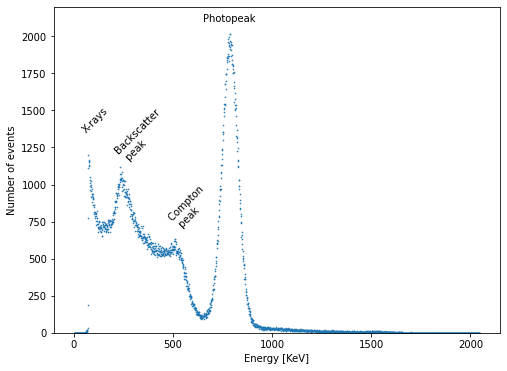

In [37]:
# Step 1 - read and plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as so

cs_spectrum = pd.read_csv('data_files/cs137_spectrum.txt', delimiter='\t')
cs_spectrum.tail(5)

plt.figure(figsize=(8,6))
plt.xlabel('Energy [KeV]')
plt.ylabel('Number of events')

plt.ylim(top=2200)

plt.plot(cs_spectrum['Channel'], cs_spectrum['Cs137'], 'o', ms=0.6)

plt.text(32, 1350, 'X-rays', rotation=45)
plt.text(200, 1150, 'Backscatter \n peak', rotation=45)
plt.text(470, 700, 'Compton \n peak', rotation=45)
plt.text(650, 2100, 'Photopeak')

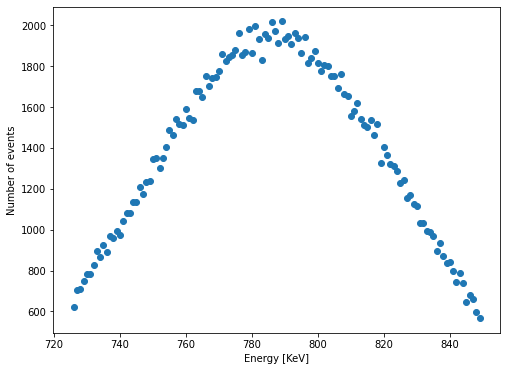

In [38]:
# Step 2 - plot photopeak

plt.figure(figsize=(8,6))
plt.xlabel('Energy [KeV]')
plt.ylabel('Number of events')

# The x-axis data
channels = cs_spectrum.loc[:,'Channel'][(cs_spectrum['Channel'] > 725) & (cs_spectrum['Channel'] < 850)]

# The y-axis data
counts = cs_spectrum.loc[:,'Cs137'][(cs_spectrum['Channel'] > 725) & (cs_spectrum['Channel'] < 850)]

plt.plot(channels, counts, 'o')

In [39]:
# Step 3 - write equation

def gauss_f(x,A,mu,sig):
    """A Gaussian fit function"""
    return A*np.exp(-(x-mu)**2/sig**2)

In [40]:
# Step 4 - try fitting

popt, pcov = so.curve_fit(gauss_f, channels, counts)

pcov

/home/grigoris/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

Πολλές απροσδιόριστες παράμετρες που σημαίνει ότι δεν δούλεψρ η διαδιασία. Άρα θα πρέπει να δώσουμε κάποιες αρχικές συνθήκες. 

In [41]:
# Step 5 - fitting by guessing initial values
popt, pcov = so.curve_fit(gauss_f, channels, counts,
                          p0=[2000, 790, 70])

In [42]:
# Step 6 - printing best parameters

print(f'Α : {popt[0]:0.4f} +/- {np.sqrt(pcov[0][0]):0.4f} (counts)')
print(f'mean : {popt[1]:0.4f} +/- {np.sqrt(pcov[1][1]):0.4f} (KeV)')
print(f'sigma : {popt[2]:0.4f} +/- {np.sqrt(pcov[2][2]):0.4f} (KeV)')

Α : 1939.5551 +/- 5.7026 (counts)
mean : 786.3385 +/- 0.1440 (KeV)
sigma : 57.7872 +/- 0.2643 (KeV)


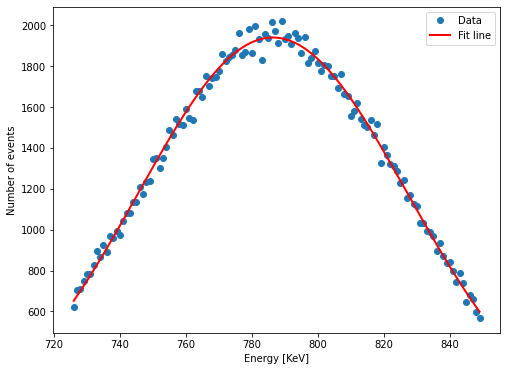

In [43]:
# Step 7 - replotting

A_opt, mu_opt, sig_opt = popt
x_model = np.linspace(min(channels), max(channels), 1000)
y_model = gauss_f(x_model, *popt)

plt.figure(figsize=(8,6))
plt.xlabel('Energy [KeV]')
plt.ylabel('Number of events')

plt.plot(channels, counts, 'o', label='Data')
plt.plot(x_model, y_model, color='r', lw=2.0, label='Fit line')

plt.legend()

In [44]:
# Step 8 - estimate parameters with errors

counts_err = np.sqrt(counts)

popt, pcov = so.curve_fit(gauss_f, channels, counts, 
                          sigma=counts_err, 
                          p0=[2000, 790, 90])

print(f'Α : {popt[0]:0.4f} +/- {np.sqrt(pcov[0][0]):0.4f} (counts)')
print(f'mean : {popt[1]:0.4f} +/- {np.sqrt(pcov[1][1]):0.4f} (KeV)')
print(f'sigma : {popt[2]:0.4f} +/- {np.sqrt(pcov[2][2]):0.4f} (KeV)')

Α : 1936.8304 +/- 6.2505 (counts)
mean : 786.2952 +/- 0.1288 (KeV)
sigma : 57.8816 +/- 0.2293 (KeV)


In [45]:
# EOF